<a href="https://colab.research.google.com/github/imjoung/DataScience/blob/main/practice/project2_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries for reading and handling the data
import numpy as np
import pandas as pd

# Libraries for data cisualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Libraries for creating ML model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier



# Library for Analysing the ML model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
df = pd.read_excel('/content/2016-20.xlsx')
# 데이터 살펴보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2810 entries, 0 to 2809
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사고일시    2810 non-null   int64 
 1   시군      2810 non-null   object
 2   사고유형    2810 non-null   object
 3   법규위반    2810 non-null   object
 4   노면상태    2810 non-null   object
 5   기상상태    2810 non-null   object
 6   도로형태    2810 non-null   object
 7   사고내용    2810 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 175.8+ KB


In [ ]:
df_pd = pd.DataFrame(df)
df_pd.head()

,사고일시,시군,사고유형,법규위반,노면상태,기상상태,도로형태,사고내용
0,1,홍성군,차대사람,안전운전불이행,건조,맑음,단일로,0
1,1,청양군,차량단독,안전운전불이행,습기,안개,단일로,0
2,1,논산시,차량단독,안전운전불이행,건조,맑음,단일로,1
3,1,서산시,차량단독,안전운전불이행,습기,안개,단일로,1
4,1,예산군,차대사람,보행자보호의무위반,습기,안개,교차로,1


### categorical -> 시각화

In [ ]:
# 변수 -> 카테고리(범주형) 형태로 변경
categorical_var =['사고일시','시군','사고유형','법규위반','노면상태','기상상태','도로형태']
df[categorical_var] = df[categorical_var].astype('category')

df['사고내용'] = df['사고내용'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2810 entries, 0 to 2809
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   사고일시    2810 non-null   category
 1   시군      2810 non-null   category
 2   사고유형    2810 non-null   category
 3   법규위반    2810 non-null   category
 4   노면상태    2810 non-null   category
 5   기상상태    2810 non-null   category
 6   도로형태    2810 non-null   category
 7   사고내용    2810 non-null   object  
dtypes: category(7), object(1)
memory usage: 43.4+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



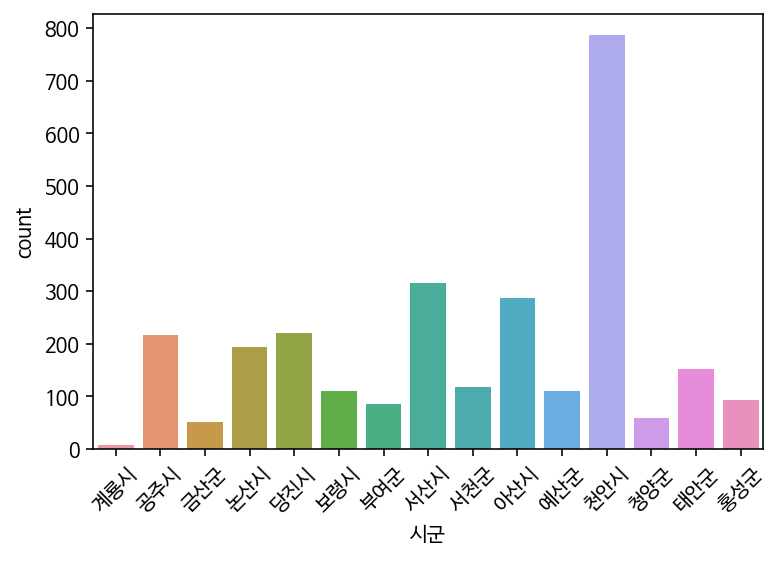

In [ ]:
bar_plot = sns.countplot(df.시군)
plt.xticks(rotation=45)
plt.show()

In [ ]:
fig = px.scatter(df, x ='시군', y ='사고일시', color ='사고내용', color_discrete_map='Jet')
fig.show()

In [ ]:
px.bar(df.groupby('법규위반').sum().reset_index()[['법규위반','사고내용']],
       x ='법규위반', y='사고내용',color='법규위반',
       title = '법규위반 별 사망사고')

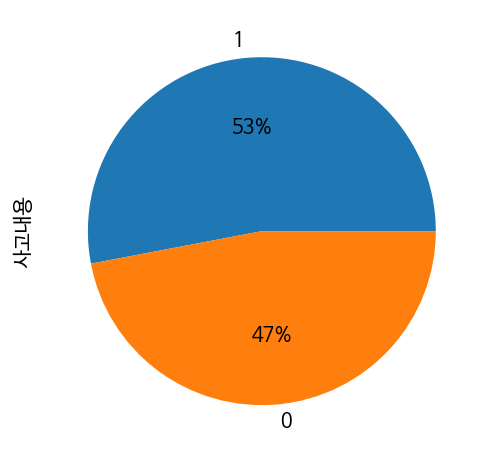

In [ ]:
df.사고내용.value_counts().plot.pie(autopct='%1.f%%')

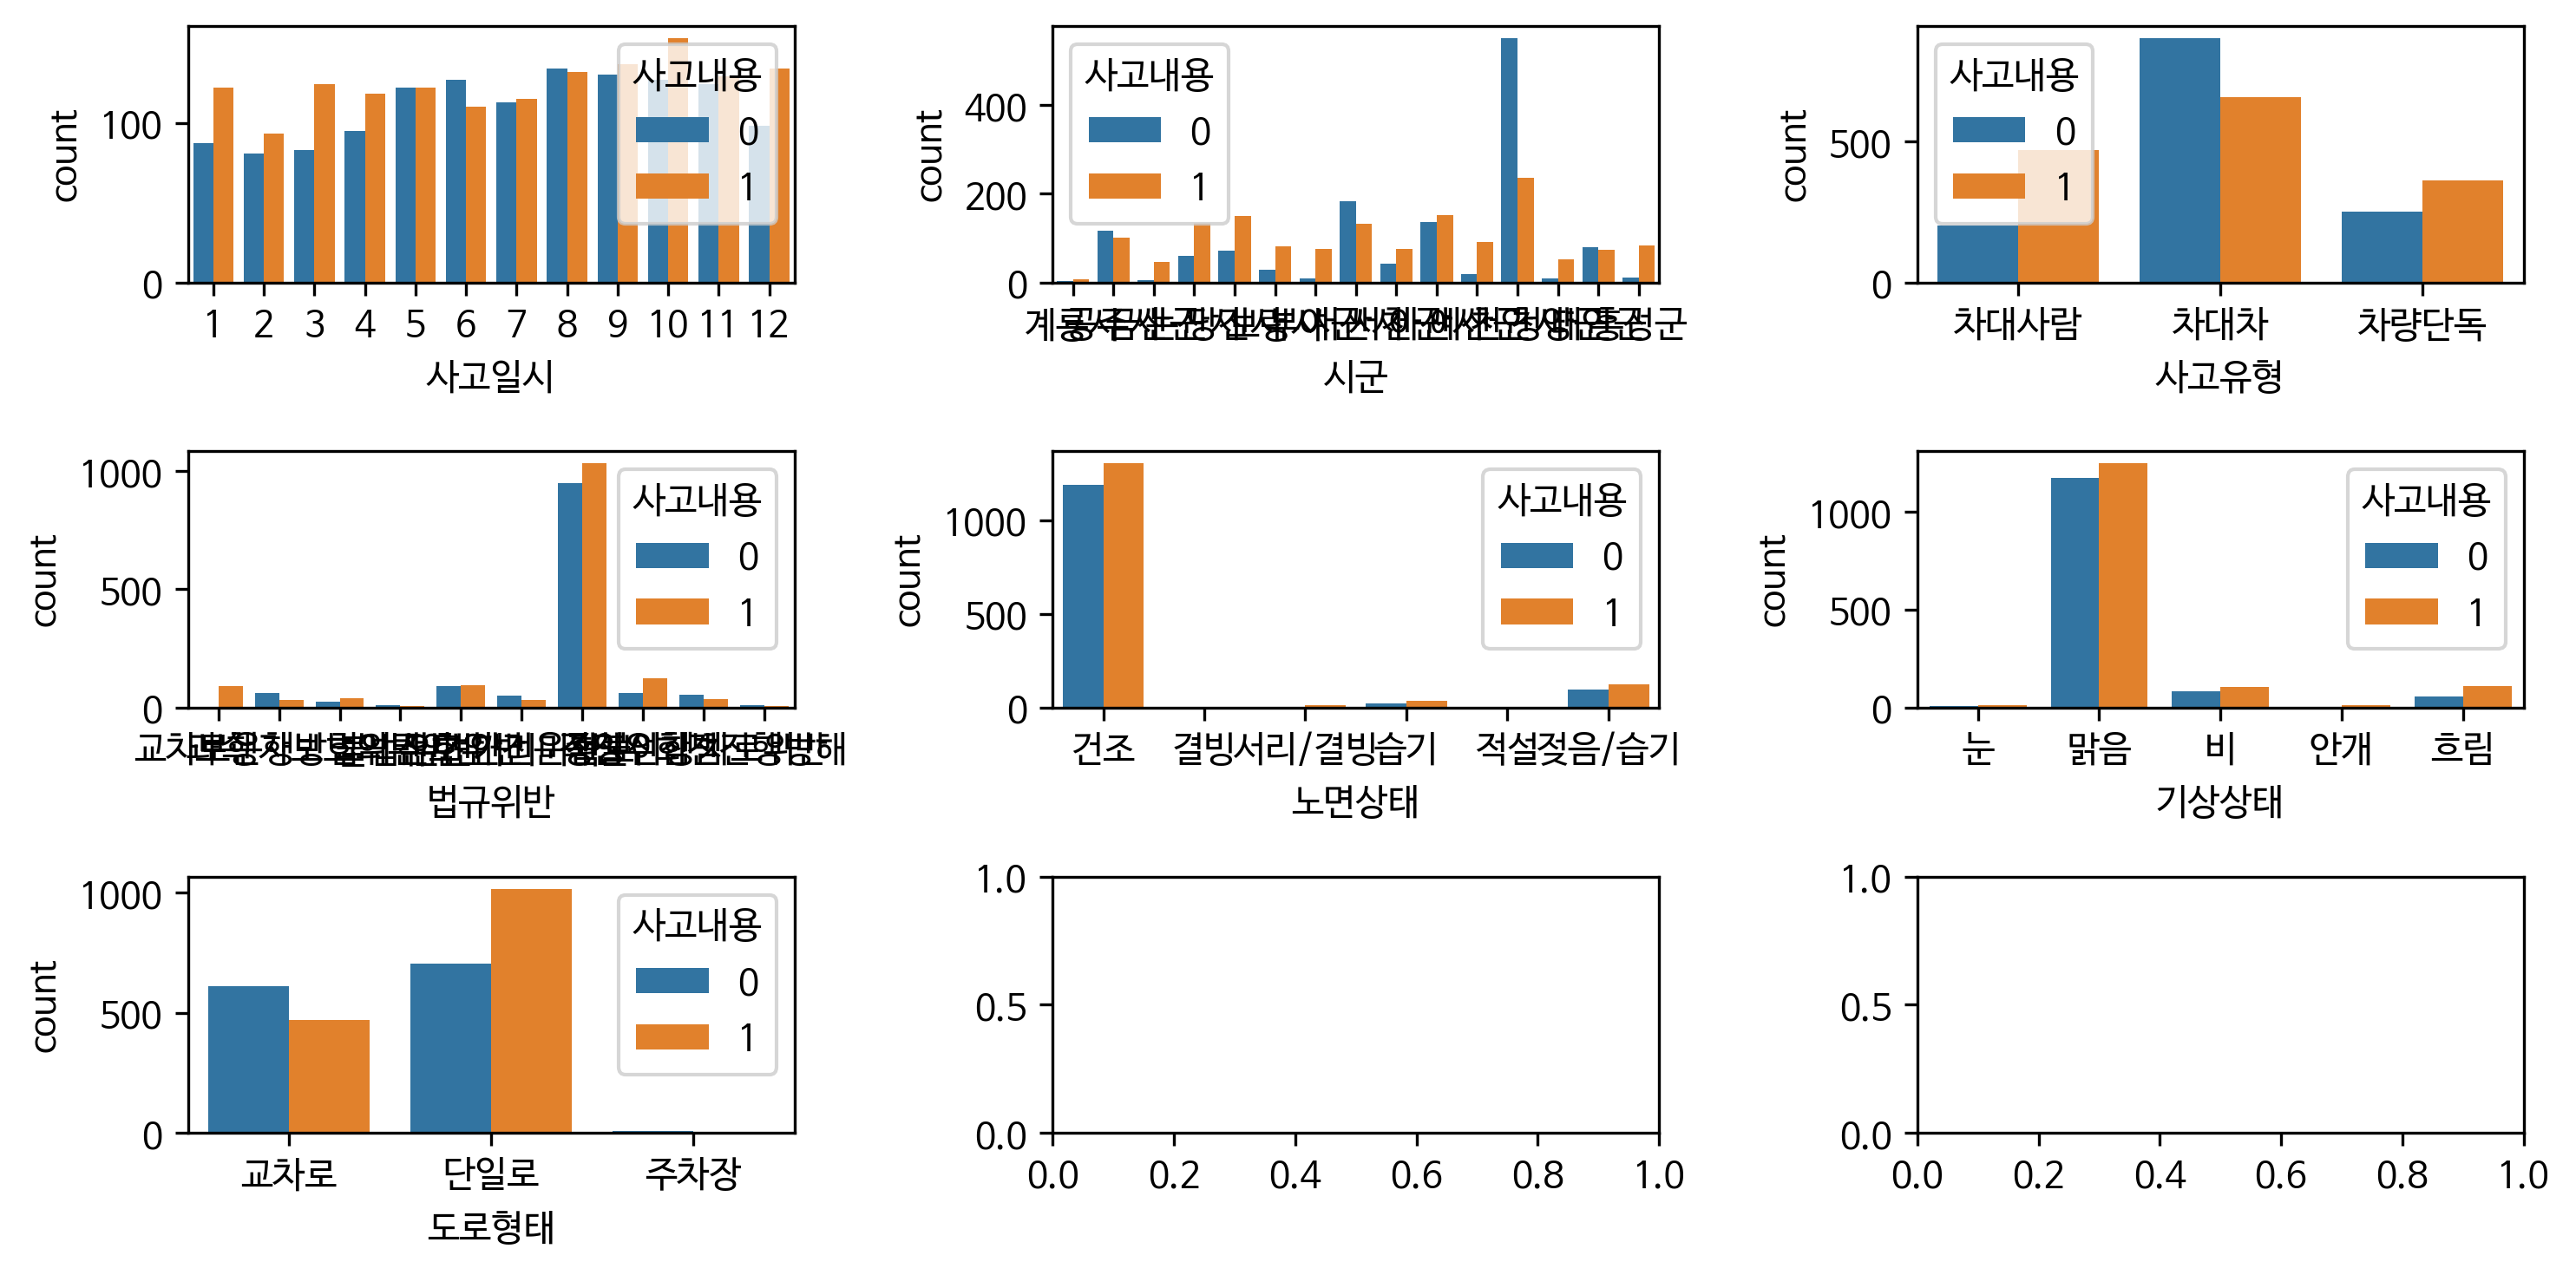

In [ ]:
# 범주형으로 되어 있는 컬럼에 대한 사망, 생존의 관계 확인
fig,ax=plt.subplots(3,3,figsize=(10,5),dpi=150)

for axis, cat_var in zip(ax.ravel(), categorical_var) :
  bar_plot = sns.countplot(x=cat_var, data=df, hue='사고내용',ax=axis)
plt.tight_layout()

### label

In [ ]:
#df = df.drop('시군',axis=1)

In [ ]:
# 라벨 인코더 생성
le = LabelEncoder()

df['시군'] = le.fit_transform(df['시군'])


# 차대사람:0, 차대차:1, 차량단독:2
df['사고유형'] = le.fit_transform(df['사고유형'])

# 건조:0, 서리/결빙:1, 적설:2, 젖음/습기:3
df['노면상태'] = le.fit_transform(df['노면상태'])

# 눈:0, 맑음:1, 비:2, 흐림:3
df['기상상태'] = le.fit_transform(df['기상상태'])

# 교차로:0, 단일로:1, 주차장:2
df['도로형태'] = le.fit_transform(df['도로형태'])

# 과속:0, 교차로운행방법위반:1, 보행자보호의무위반:2, 불법유턴:3, 신호위반:4,
# 안전거리미확보:5, 안전운전불이행:6, 중앙선침범:7, 직진우회전진행방해:8, 차로위반:9
df['법규위반'] = le.fit_transform(df['법규위반'])



In [ ]:
# 숫자형태의 변수 -> 카테고리(범주형) 형태로 변경
categorical_var =['사고일시','시군','사고유형','법규위반','노면상태','기상상태','도로형태']
df[categorical_var] = df[categorical_var].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2810 entries, 0 to 2809
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   사고일시    2810 non-null   category
 1   시군      2810 non-null   category
 2   사고유형    2810 non-null   category
 3   법규위반    2810 non-null   category
 4   노면상태    2810 non-null   category
 5   기상상태    2810 non-null   category
 6   도로형태    2810 non-null   category
 7   사고내용    2810 non-null   object  
dtypes: category(7), object(1)
memory usage: 43.4+ KB


In [ ]:
df['사고내용'] = df['사고내용'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2810 entries, 0 to 2809
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   사고일시    2810 non-null   category
 1   시군      2810 non-null   category
 2   사고유형    2810 non-null   category
 3   법규위반    2810 non-null   category
 4   노면상태    2810 non-null   category
 5   기상상태    2810 non-null   category
 6   도로형태    2810 non-null   category
 7   사고내용    2810 non-null   category
dtypes: category(8)
memory usage: 24.3 KB


In [ ]:
df.to_csv('project2.csv')

### 데이터 분류하기

In [ ]:
# X(시험지)
# 분석에 사용할 속성을 선택 
X = df.iloc[:,:-1]
# 설명 변수 데이터를 정규화
#X = preprocessing.StandardScaler().fit(X).transform(X)
#X

In [ ]:
# y(정답) 분리하기
y = df['사고내용']

In [ ]:
# 훈련용/테스트 데이터 분리하기
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 train_size=0.85,
                                                 random_state=77)

### 머신러닝 구축

In [ ]:
# 훈련 데이터 
print(X_train.shape, y_train.shape)
#print(y_train)

# 테스트 데이터
print(X_test.shape, y_test.shape)
#print(y_test)

(2388, 7) (2388,)
(422, 7) (422,)


- Logistic

In [ ]:
# Logistic 
log_reg = LogisticRegression().fit(X_train,y_train)

# 정확도 확인
print('Train data Score : {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test data Score : {:.3f}'.format(log_reg.score(X_test,y_test)))

Train data Score : 0.590
Test data Score : 0.588


- Decision Tree

In [ ]:
# Decision tree
tree = DecisionTreeClassifier(max_depth=8,
                              min_samples_leaf=15,
                              min_samples_split=40).fit(X_train,y_train)

# 정확도 확인
print('Train data Score : {:.3f}'.format(tree.score(X_train,y_train)))
print('Test data Score : {:.3f}'.format(tree.score(X_test,y_test)))

Train data Score : 0.717
Test data Score : 0.654


- Grandient boosting

In [ ]:
# Grandient boosting (앙상블)
boost = GradientBoostingClassifier(max_depth=3,
                                   learning_rate=0.1).fit(X_train,y_train)

# 정확도 확인
print('Train data Score : {:.3f}'.format(boost.score(X_train,y_train)))
print('Test data Score : {:.3f}'.format(boost.score(X_test,y_test)))

Train data Score : 0.735
Test data Score : 0.699


- Random Forest

In [ ]:
# Random Forest (앙상블)
random = RandomForestClassifier(n_estimators=100,
                                max_depth=9,
                                random_state=0).fit(X_train,y_train)

# 정확도 확인
print('Train data Score : {:.3f}'.format(random.score(X_train,y_train)))
print('Test data Score : {:.3f}'.format(random.score(X_test,y_test)))

Train data Score : 0.782
Test data Score : 0.697


In [ ]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis().fit(X_train,y_train)

# 정확도 확인
print('Train data Score : {:.3f}'.format(lda.score(X_train,y_train)))
print('Test data Score : {:.3f}'.format(lda.score(X_test,y_test)))

Train data Score : 0.588
Test data Score : 0.588


### 모델 성능평가 - ROC커브

In [ ]:
def plot_auc_roc(model):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

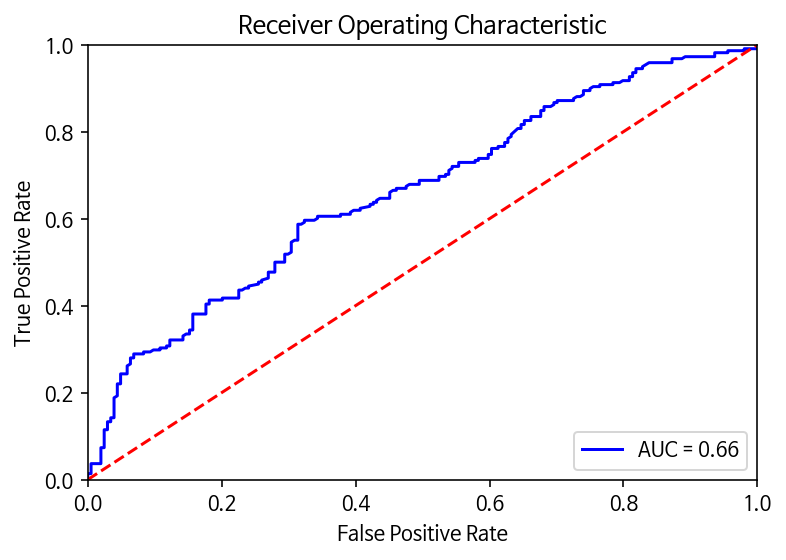

In [ ]:
# Logistic - ROC
plot_auc_roc(log_reg)

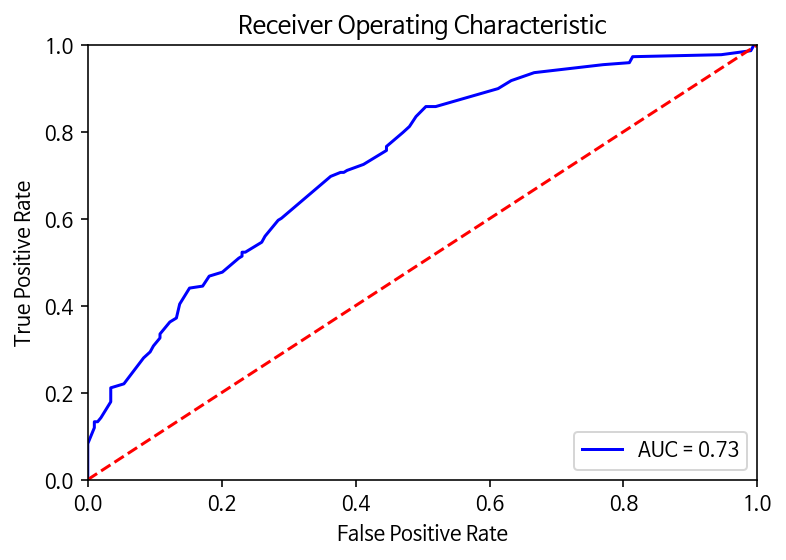

In [ ]:
# Decision tree - ROC
plot_auc_roc(tree)

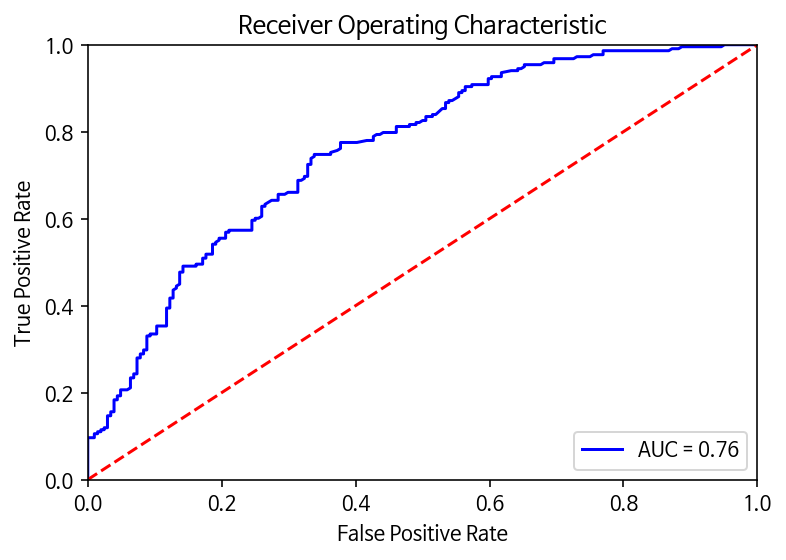

In [ ]:
# Random Forest - roc
plot_auc_roc(random)

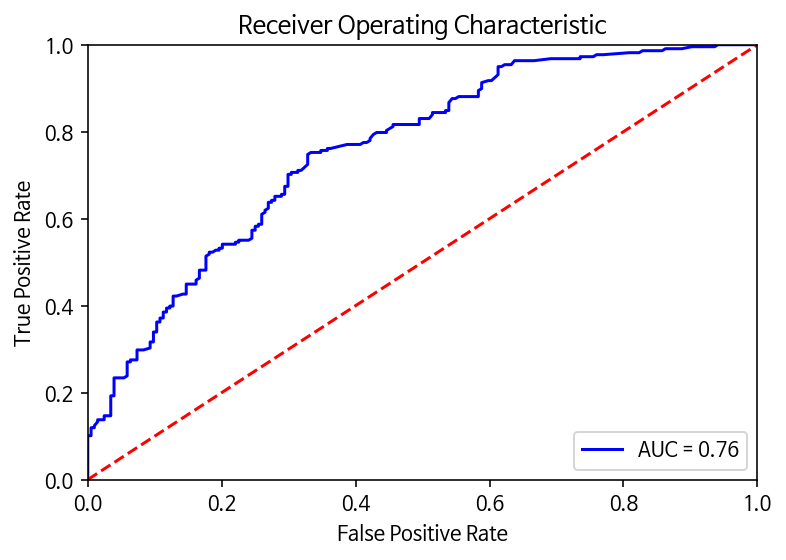

In [ ]:
# Gradient boosting - roc
plot_auc_roc(boost)

### 모델 성능평가

In [ ]:
# Logistic Regression 평가 지표
lg_y_hat = log_reg.predict(X_test)
lg_report = metrics.classification_report(y_test,lg_y_hat)
print("Logistic Regression 평가 지표",'\n')
print(lg_report)

print('accuracy', metrics.accuracy_score(y_test,lg_y_hat) )
print('precision', metrics.precision_score(y_test,lg_y_hat) )
print('recall', metrics.recall_score(y_test,lg_y_hat) )
print('f1', metrics.f1_score(y_test,lg_y_hat) )

Logistic Regression 평가 지표 

              precision    recall  f1-score   support

           0       0.59      0.48      0.53       204
           1       0.59      0.69      0.63       218

    accuracy                           0.59       422
   macro avg       0.59      0.58      0.58       422
weighted avg       0.59      0.59      0.58       422

accuracy 0.5876777251184834
precision 0.5859375
recall 0.6880733944954128
f1 0.6329113924050632


In [ ]:
# Decision tree 평가 지표
tree_y_hat = tree.predict(X_test)
tree_report = metrics.classification_report(y_test,tree_y_hat)
print("Decision tree 평가 지표",'\n')
print(tree_report)

print('accuracy', metrics.accuracy_score(y_test,tree_y_hat) )
print('precision', metrics.precision_score(y_test,tree_y_hat) )
print('recall', metrics.recall_score(y_test,tree_y_hat) )
print('f1', metrics.f1_score(y_test,tree_y_hat) )


Decision tree 평가 지표 

              precision    recall  f1-score   support

           0       0.62      0.71      0.67       204
           1       0.69      0.60      0.64       218

    accuracy                           0.65       422
   macro avg       0.66      0.66      0.65       422
weighted avg       0.66      0.65      0.65       422

accuracy 0.6540284360189573
precision 0.6894736842105263
recall 0.6009174311926605
f1 0.642156862745098


In [ ]:
# Grandient boosting 평가 지표
boost_y_hat = boost.predict(X_test)
boost_report = metrics.classification_report(y_test,boost_y_hat)
print("Grandient  boosting 평가 지표",'\n')
print(boost_report)

print('accuracy', metrics.accuracy_score(y_test,boost_y_hat) )
print('precision', metrics.precision_score(y_test,boost_y_hat) )
print('recall', metrics.recall_score(y_test,boost_y_hat) )
print('f1', metrics.f1_score(y_test,boost_y_hat) )

Grandient  boosting 평가 지표 

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       204
           1       0.71      0.71      0.71       218

    accuracy                           0.70       422
   macro avg       0.70      0.70      0.70       422
weighted avg       0.70      0.70      0.70       422

accuracy 0.6990521327014217
precision 0.7077625570776256
recall 0.7110091743119266
f1 0.7093821510297483


In [ ]:
# Random Forest 평가 지표
random_y_hat = random.predict(X_test)
random_report = metrics.classification_report(y_test,random_y_hat)
print(" Random Forest 평가 지표",'\n')
print(random_report)

print('accuracy', metrics.accuracy_score(y_test,random_y_hat) )
print('precision', metrics.precision_score(y_test,random_y_hat) )
print('recall', metrics.recall_score(y_test,random_y_hat) )
print('f1', metrics.f1_score(y_test,random_y_hat) )


 Random Forest 평가 지표 

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       204
           1       0.70      0.72      0.71       218

    accuracy                           0.70       422
   macro avg       0.70      0.70      0.70       422
weighted avg       0.70      0.70      0.70       422

accuracy 0.6966824644549763
precision 0.7008928571428571
recall 0.7201834862385321
f1 0.7104072398190044


In [ ]:
precision_list = []
recall_list=[]

# Logistic
precision_list.append(metrics.precision_score(y_test,lg_y_hat))
recall_list.append(metrics.recall_score(y_test,lg_y_hat))

# decision
precision_list.append(metrics.precision_score(y_test,tree_y_hat))
recall_list.append(metrics.recall_score(y_test,tree_y_hat))

# RF
precision_list.append(metrics.precision_score(y_test,random_y_hat))
recall_list.append(metrics.recall_score(y_test,random_y_hat))

# boost
precision_list.append(metrics.precision_score(y_test,boost_y_hat))
recall_list.append(metrics.recall_score(y_test,boost_y_hat))

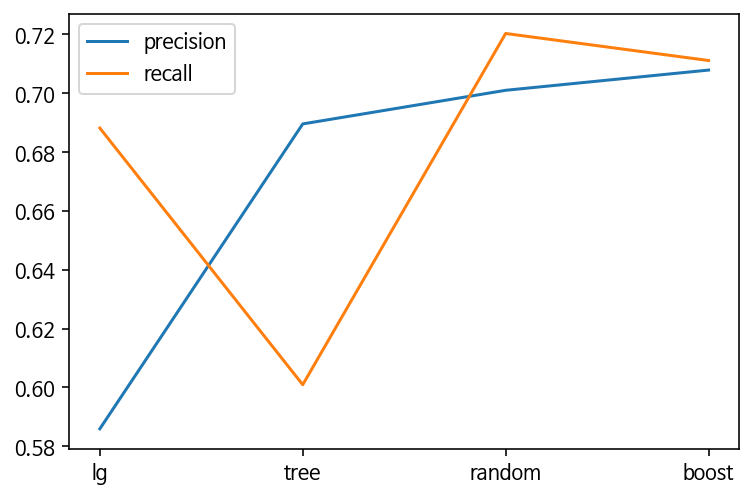

In [ ]:
plt.plot(['lg','tree','random','boost'],precision_list, label='precision')
plt.plot(['lg','tree','random','boost'],recall_list, label='recall')
plt.legend()
plt.show()